In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data=pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [68]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [69]:
data['type']=data['type'].astype('category')

In [70]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [71]:
data.dropna(inplace=True)

In [72]:
X=data.drop('type',axis=1)
y=data['type']

<Figure size 1440x1440 with 0 Axes>

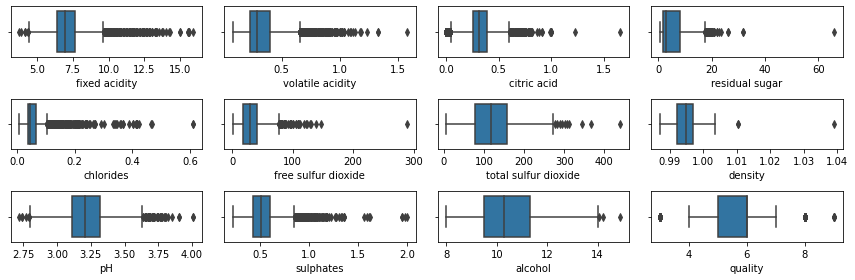

In [73]:
#checking outliers of features
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(3,4,figsize=(12,4))
ax=ax.flatten()
for i,col in enumerate(X.columns):
    sns.boxplot(data=X,x=col,ax=ax[i])
plt.tight_layout()

<Figure size 1440x1440 with 0 Axes>

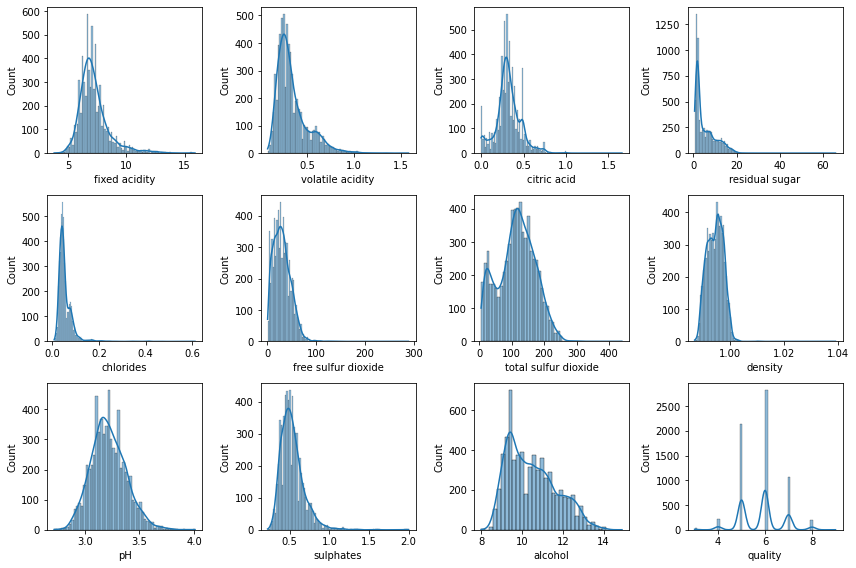

In [74]:
# Checking the distribution of values in the feature variables
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(3,4,figsize=(12,8))
ax=ax.flatten()
for i,col in enumerate(X.columns):
    sns.histplot(data=X,x=col,ax=ax[i],kde=True)
plt.tight_layout()

In [75]:
from scipy.stats import skew

In [76]:
skew_df=pd.DataFrame(X.columns,columns=['Features'])
skew_df['Skew']=skew_df['Features'].apply(lambda x:skew(X[x],bias=False))
skew_df['Absolute Skew']=skew_df['Skew'].apply(abs)

In [77]:
skew_df

,Features,Skew,Absolute Skew
0,fixed acidity,1.721648,1.721648
1,volatile acidity,1.500040,1.500040
2,citric acid,0.474907,0.474907
3,residual sugar,1.437126,1.437126
4,chlorides,5.403432,5.403432
5,free sulfur dioxide,1.223427,1.223427
6,total sulfur dioxide,-0.000425,0.000425
7,density,0.504204,0.504204
8,pH,0.391094,0.391094
9,sulphates,1.802941,1.802941


In [78]:
#remove outliers
def remove_outliers(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    data[col]=data[col].apply(lambda x:Q1-1.5*IQR if x<(Q1-1.5*IQR) else (Q3+1.5*IQR if x>Q3+1.5*IQR else x))
    return data

In [79]:
for col in X.columns:
    df=remove_outliers(X,col)

<AxesSubplot:>

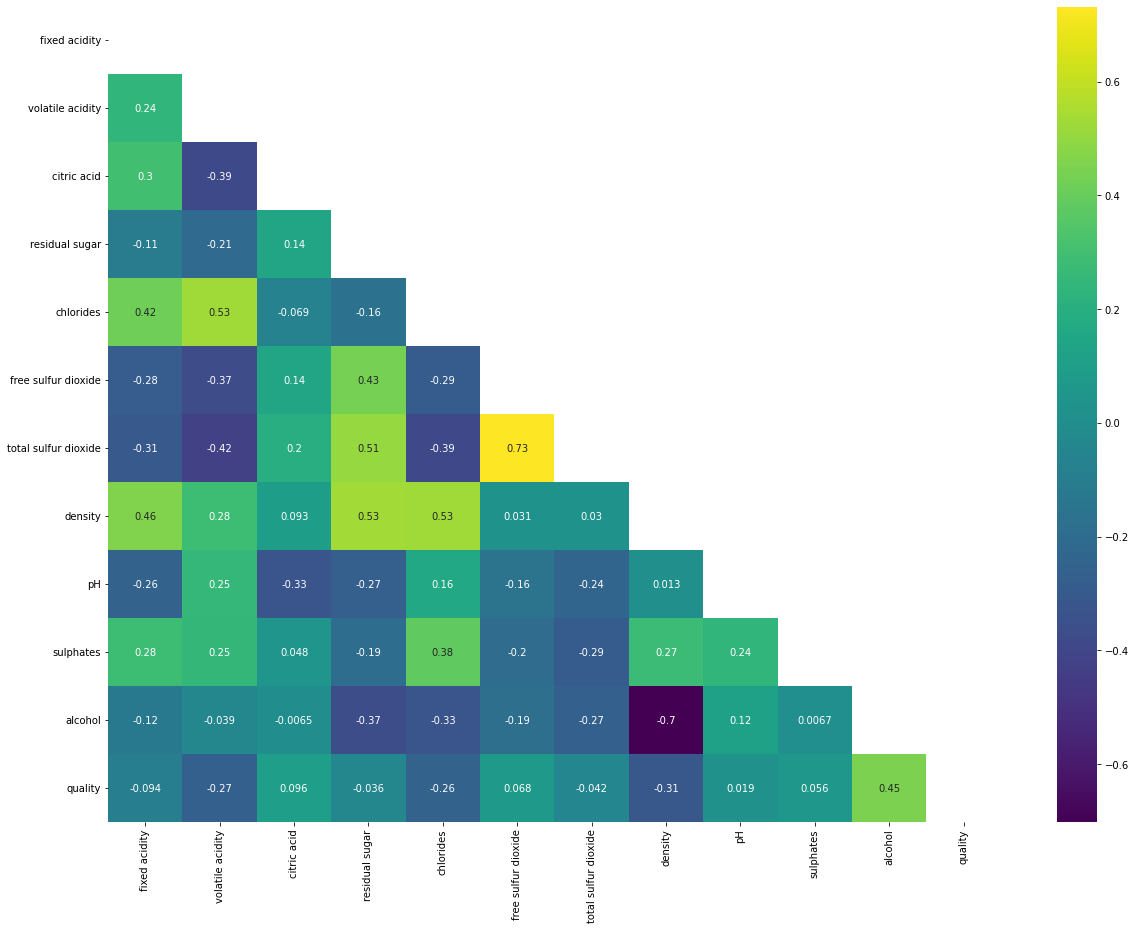

In [80]:
plt.figure(figsize=(20,15))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),cmap='viridis',annot=True,mask=mask)

In [81]:
X.drop('total sulfur dioxide',axis=1,inplace=True)

In [82]:
X['quality'].mean()

5.804812006807984

In [83]:
X['best quality'] = X['quality'].apply(lambda x: 1 if x>=5. else 0)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.0,0.27,0.36,17.55,0.045,45.0,1.0010,3.00,0.45,8.8,6.0,1
1,6.3,0.30,0.34,1.60,0.049,14.0,0.9940,3.30,0.49,9.5,6.0,1
2,8.1,0.28,0.40,6.90,0.050,30.0,0.9951,3.26,0.44,10.1,6.0,1
3,7.2,0.23,0.32,8.50,0.058,47.0,0.9956,3.19,0.40,9.9,6.0,1
4,7.2,0.23,0.32,8.50,0.058,47.0,0.9956,3.19,0.40,9.9,6.0,1


In [89]:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [90]:
X.shape,y.shape

((6463, 12), (6463,))

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.25,random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4847, 12) (1616, 12) (4847,) (1616,)


In [99]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [104]:
models={'Logistic':LogisticRegression(),
       'SVC':SVC(),
       'Dtree':DecisionTreeClassifier(),
       'Adaboost':AdaBoostClassifier(),
        'RandomForest':RandomForestClassifier(criterion='entropy'),
        'Gradient':GradientBoostingClassifier()
       }


In [105]:
results={}
kf=KFold(n_splits=10,shuffle=True)
for name,model in models.items():
    score=cross_val_score(model,X_train,y_train,cv=kf,scoring='accuracy')
    results[name]=score

In [106]:
for name,score in results.items():
    print('_________________')
    print(f"{name}:{np.mean(score)}")
    print('_________________')

_________________
Logistic:0.9896847576041579
_________________
_________________
SVC:0.9919523728380335
_________________
_________________
Dtree:0.9737914288148589
_________________
_________________
Adaboost:0.987829087501065
_________________
_________________
RandomForest:0.9880356990713128
_________________
_________________
Gradient:0.9898900911646928
_________________


In [107]:
from sklearn.metrics import accuracy_score

In [108]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('_________________')
    print(f"{name}:{accuracy_score(y_test,y_pred)}")
    print('_________________')

_________________
Logistic:0.9882425742574258
_________________
_________________
SVC:0.9919554455445545
_________________
_________________
Dtree:0.969059405940594
_________________
_________________
Adaboost:0.9832920792079208
_________________
_________________
RandomForest:0.9925742574257426
_________________
_________________
Gradient:0.989480198019802
_________________


In [109]:
svc=SVC()
params={"C":[0.1,1,2],
       'kernel':['rbf','sigmoid','linear'],
       'gamma':np.linspace(0.1,1,4)}
cv=GridSearchCV(svc,params,verbose=2)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

[CV] END .........................C=1, gamma=1.0, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=1.0, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=1.0, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=1.0, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=1.0, kernel=rbf; total time=   0.8s
[CV] END .....................C=1, gamma=1.0, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=1.0, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=1.0, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=1.0, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=1.0, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.0, kernel=linear; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 2], 'gamma': array([0.1, 0.4, 0.7, 1. ]),
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=2)

In [110]:
best=cv.best_params_


In [111]:
new_svc=SVC(**best)
new_svc.fit(X_train,y_train)
pred=new_svc.predict(X_test)
accuracy_score(y_test,pred)

0.9907178217821783

In [119]:
rfc=RandomForestClassifier()
params={'n_estimators':[100,300,400],
       'criterion':['gini','entropy'],
       'min_samples_split':[2,4,6],
       'min_samples_leaf':[1,3,5]}
cv=GridSearchCV(rfc,params,verbose=2)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END cr

[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   1.2s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   1.7s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   1.5s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   1.7s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=6, n_estim

[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   1.0s
[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   1.1s
[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   1.4s
[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   1.4s
[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   1.5s
[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   1.5s
[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   1.5s
[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, min_samples_leaf=1

[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, min_samples_leaf=5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 300, 400]},
             verbose=2)

In [120]:
best_params=cv.best_params_

In [123]:
new_rfc=RandomForestClassifier(**best_params)
new_rfc.fit(X_train,y_train)
pred_rfc=new_rfc.predict(X_test)
accuracy_score(y_test,pred_rfc)

0.994430693069307

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

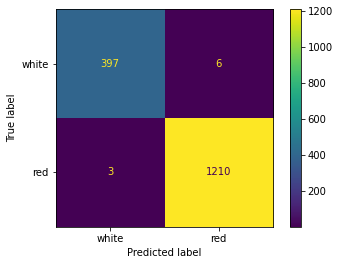

In [124]:
cm=confusion_matrix(y_test,pred_rfc)
cmd=ConfusionMatrixDisplay(cm,display_labels=['white','red'])
cmd.plot()